# Machine Learning Project

## Objective

The objective of this jupyter notebook, as part of the web service project, is to of to train a model using the data set provided, explain the model and give an analysis of its accuracy.

In [1]:
# import neccessary libaries. Will add to as needs be.
# to plot data
import matplotlib.pyplot as plt
#to load data as a pandas df
import pandas as pd
# to convert data to a numpy array
import numpy as np
%matplotlib inline
# setting some plt parameters that are always useful
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# import seaborn for visualiaztions later.
import seaborn as sns
# using for linear regresssion
from sklearn.linear_model import LinearRegression
# using for splitting data into train & test.
from sklearn.model_selection import train_test_split
# using for linear model
from sklearn import linear_model
# using to evaluate sklearn model results.
from sklearn import metrics
#using for polynominal regression.
from sklearn.preprocessing import PolynomialFeatures
# using for keras model
import tensorflow as tf
from tensorflow import keras



# Adapted from https://stackoverflow.com/q/43027980
# A magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).


## Load the Data

In [2]:
# reading the file in as csv.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
# Making a copy of the data just in case I need it later on.
dfmycopy = df

## Explore the Data

In [3]:
# take a look at the shape: #rows, colums
print("Number of rows:", df.shape[0],"\nNumber of columns: ",df.shape[1])

Number of rows: 500 
Number of columns:  2


In [4]:
# Do any  NaN (null) values exist?
df.isnull().values.any()

False

In [5]:
#take a peak at the first rows  (note to self zero values exist)
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
#take at the last rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [7]:
# describe the data set. 
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


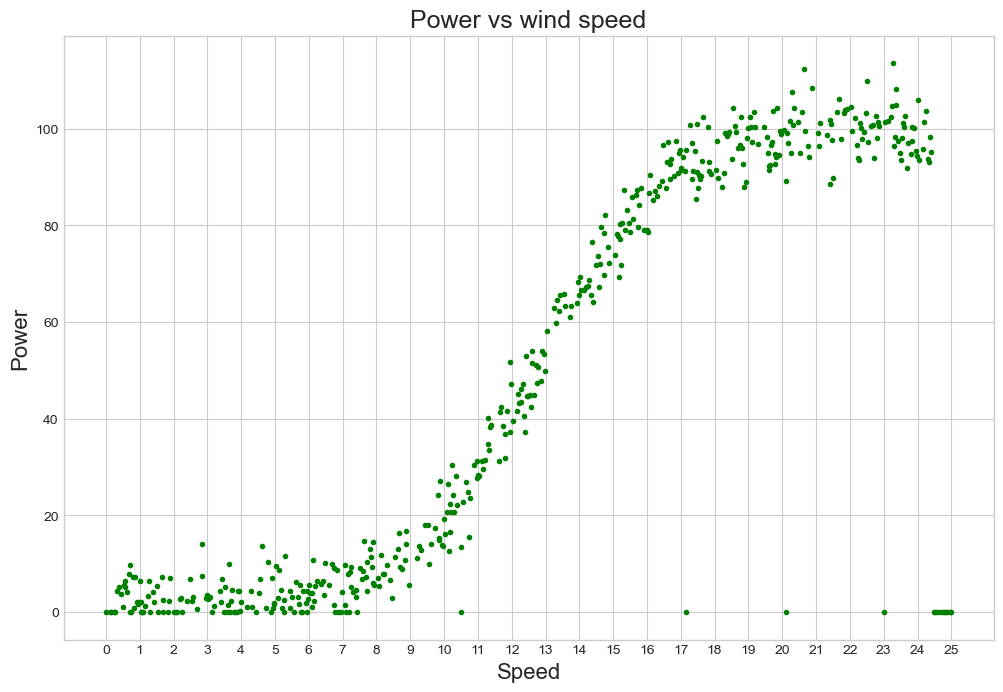

In [8]:

# Plot power versus speed to see if there is a relationship between both. 
plt.plot(df['speed'], df['power'],  '.g')
plt.title('Power vs wind speed', fontsize='18')
plt.xlabel('Speed', fontsize='16')
plt.ylabel('Power', fontsize='16')
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.show()

## Initial Visual Observations

From this visual, there appears three regions approximately. In the first region, below speeds of approximately 7.5 the power generated appears low and there does not appear a correlation to speed. One could logically speculate that below a certain speed (threshold) power is not generated (we have all seen still wind turbines) or is at least at low speed the power generated can relatively small or close to zero.

In the second regions, from speed values 7.5 to 10 there appears to be some correlation between speed and power emerging. 

In the third region, from speed values of 10 to 17.5 approx, there appears a rapid growth of power produced.  In otherwords,power generated tends to increase linearly from around speed values of 10 to 17.5. 

In the fourth region, for datapoints with speed values of 17.5 and constant power values are produced. 

But, then there are a number of datapoints with various speed values other than 0 but power produced is zero. **Also there are no speed values beyond approximately 24.5 where there is power generated. 

The below visualization separates those datapoints where power is zero from datapoints where power was actually generated.

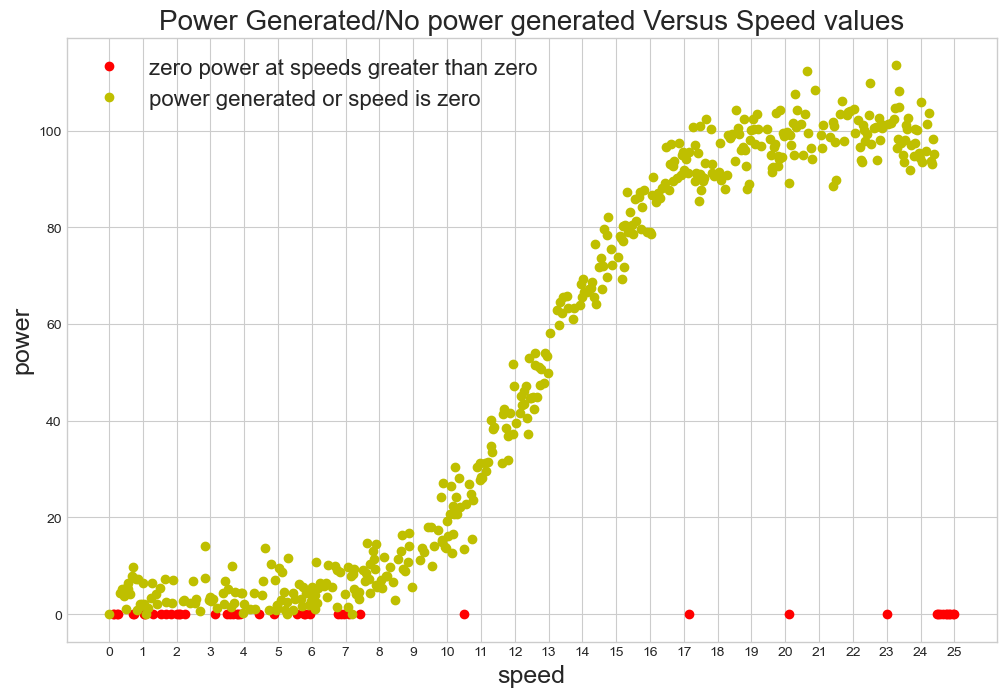

In [9]:

#Selecting rows based on certain conditions
# Adapted from https://stackoverflow.com/a/17071908 
# example df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# speed greater than zero but power less than or equal to 0
dfa= df.loc[(df['speed'] !=0) & (df['power'] == 0)]
dfb=  df.loc[((df['speed'] !=0) & (df['power'] >0))|(df['speed']==0)]
plt.plot(dfa['speed'], dfa['power'],  'ro', label='zero power at speeds greater than zero')
plt.plot(dfb['speed'], dfb['power'],  'yo', label= 'power generated or speed is zero ')
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.xlabel('speed', fontsize = 18)
plt.ylabel('power', fontsize =18)
plt.title('Power Generated/No power generated Versus Speed values', fontsize = 20)
plt.legend(fontsize = 16)
plt.show()

## Determing which datapoints to exclude from the models.

### 1. Zero power generated at speeds less than or equal to 7.5 (keep)

Before rushing into excluding all values where power is equal to zero. I think it is worth zooming in on the data where speed is less than or equal 7.5.  As the below data visualization shows there are many observations where the power generated is close to zero when speed <=7.5. In my mind these points might legitimize the existance of datapoints with zero power generated when speed <=7.5. So I am reluctant to exclude datapoints where speed <= 7.5 and power generated is zero at this stage. This is the exploratory stage in the process so this decision might well be revisited later after further investigation.

In [10]:
# examining datapoints where speed <=7.5 and power is not generated.
dfc= df.loc[(df['speed']<=7.5)& (df['power']!=0) ]
print(dfc.describe())

            speed       power
count  115.000000  115.000000
mean     4.015539    4.553670
std      2.202909    3.081373
min      0.325000    0.067000
25%      2.039500    2.126000
50%      4.304000    4.187000
75%      5.968500    6.504000
max      7.407000   14.131000


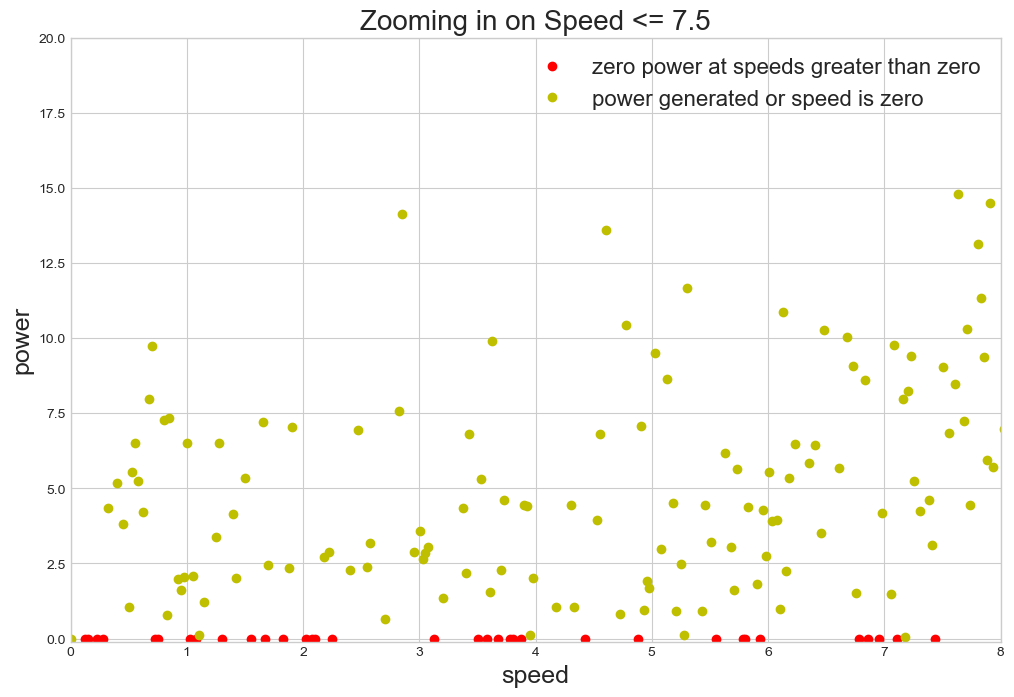

In [11]:
#Selecting rows based on certain conditions
# Adapted from https://stackoverflow.com/a/17071908 
# example df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# speed greater than zero but power less than or equal to 0
dfa= df.loc[(df['speed'] !=0) & (df['power'] == 0)]
dfb=  df.loc[((df['speed'] !=0) & (df['power'] >0))|(df['speed']==0)]
plt.plot(dfa['speed'], dfa['power'],  'ro', label='zero power at speeds greater than zero')
plt.plot(dfb['speed'], dfb['power'],  'yo', label= 'power generated or speed is zero ')
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.xlabel('speed', fontsize = 18)
plt.ylabel('power', fontsize =18)
plt.xticks(np.arange(min(df['speed']), max(df['speed'])+1, 1))
plt.title('Zooming in on Speed <= 7.5', fontsize = 20)
plt.legend(fontsize = 16)
plt.xlim(0, 8)
plt.ylim(-0.1,20)
plt.show()


### 2. Zero power generated for speeds between > 7.5 and < 24.5 (exclude)

I do think the 4 datapoints with zero power generated and with speed greater than 7.5 but less than 24.5 approxmiately are strong contenders for being dropped from the dataset.  They do seem to be outliers. Outliers are the data instances that stand out amongst other datapoints in the dataset and fail to conform to the normal behavior in a dataset [1],[2].

### 3. Zero power generated for speeds >= 24.5 (exclude)

With regards to zero power generated datapoints with speeds that are greater than 24.5, I am unsure if they should be excluded. But we need to zoom in on the datapoints where speed is greater than 24.
Looking on below figure "Zooming in on Speed <= 24" we can see that **ALL observations at speed 24.5 or greater have zero power**.  Therefore I would conclude at this stage that these observations might well be legitimate. Perhaps a wind turbine doesnt function in "high" winds. My concern is though do I have enough datapoints with speed >=24.5 so that a model will distinguish these datapoints from datapoints with speed < 24.5. Actually, I do not have a model that will accurately predict such values ( I am retro applying this learning). 

So to summarize, for the moment or until I know more, keep all datapoints with zero power except those datapoints with speed speed greater than 7.5.

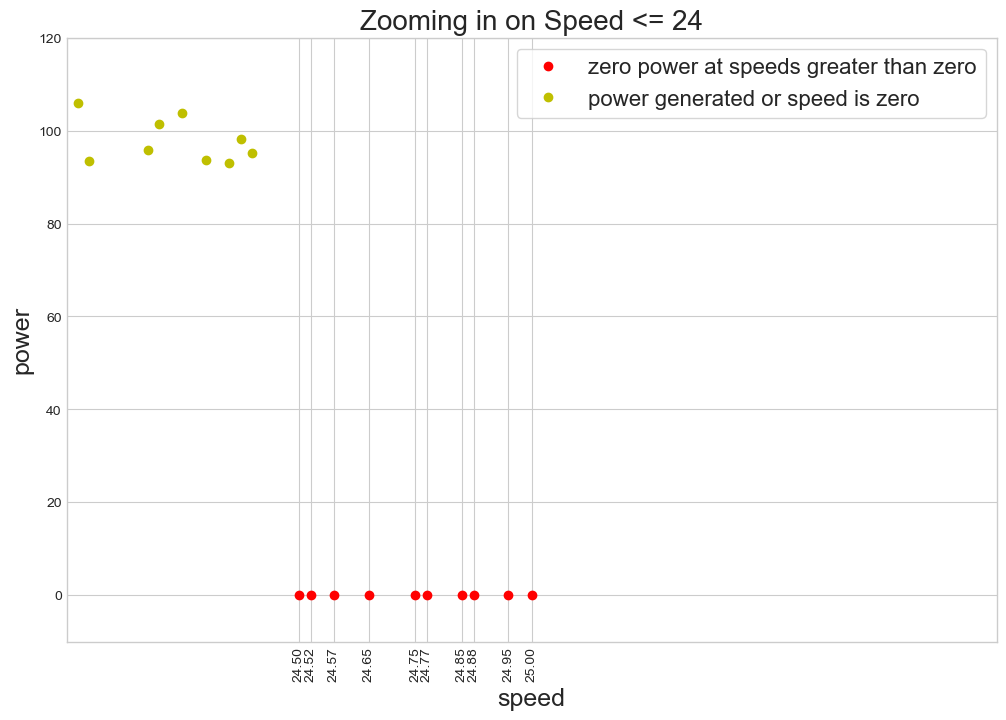

In [12]:
# fix the zoom in 

#Selecting rows based on certain conditions
# Adapted from https://stackoverflow.com/a/17071908 
# example df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# speed greater than zero but power less than or equal to 0
dfa= df.loc[(df['speed'] !=0) & (df['power'] == 0)]
dfb=  df.loc[((df['speed'] !=0) & (df['power'] >0))|(df['speed']==0)]
plt.plot(dfa['speed'], dfa['power'],  'ro', label='zero power at speeds greater than zero')
plt.plot(dfb['speed'], dfb['power'],  'yo', label= 'power generated or speed is zero ')
plt.xticks(dfa['speed'], rotation=90)
plt.xlabel('speed', fontsize = 18)
plt.ylabel('power', fontsize =18)
plt.title('Zooming in on Speed <= 24', fontsize = 20)
# Adapted from https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
plt.legend(fontsize = 16, frameon=True)
plt.xlim(24, 26)
plt.ylim(-10,120)
plt.show()

## Data Cleaning

Removing datapoints with zero power produced at speeds greater than speed 7.5.

In [14]:
# Adapated from https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe

dfclean = df.loc[~((df['speed']>=7.5) &(df['power']==0))]
dfclean.count()

speed    486
power    486
dtype: int64

### View the Cleaned data 

Plotting the linear relationship between power and speed first for the original data and then the cleaned data and comparing side by side reveals little differnce as we have only excluded 14 data points. 

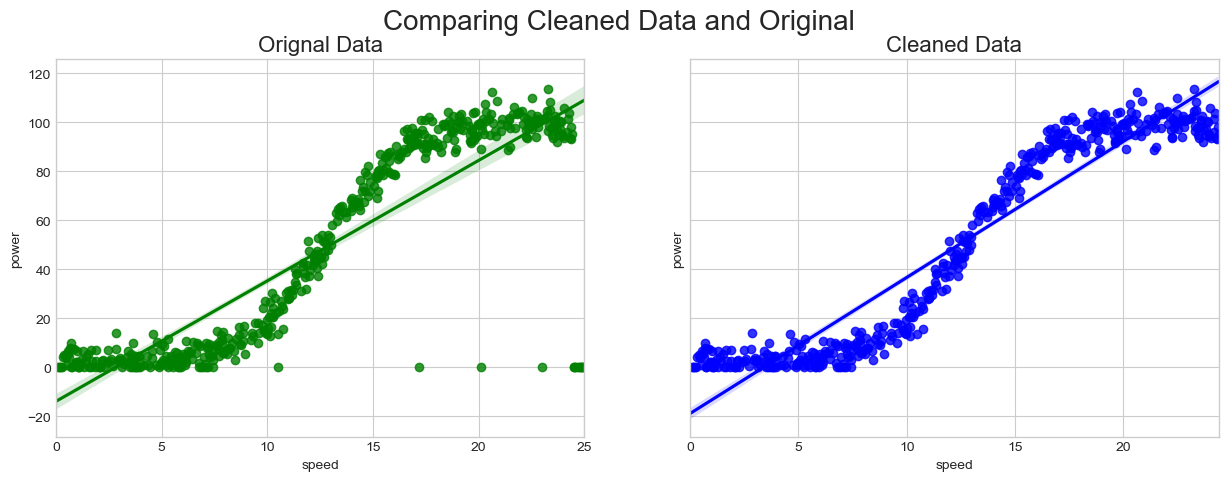

In [15]:

# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparing Cleaned Data and Original', fontsize = 20)
axes[0].set_title('Orignal Data', fontsize = 16)
sns.regplot(ax=axes[0],x=df['speed'], y=df['power'],color="g", data=df)
axes[1].set_title('Cleaned Data', fontsize = 16)
sns.regplot(ax=axes[1],x=dfclean['speed'], y=dfclean['power'], color="b",data=dfclean)

This is confirmed imposing one plot on top of another (ie viewing the original data and the cleaned data in the same subplot). The data cleansing process made little difference and may have been futile based on my decisions as to what was considered outliers. But is the a linear regression the correct tool to use anyway?

In [ ]:
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

sns.regplot(x=df['speed'], y=df['power'],color = "g", data=df)

sns.regplot(x=dfclean['speed'], y=dfclean['power'],color = "b", data=dfclean)


## MODELS

### Model 1 : Linear Regression

Firstly I will try to fit a linear model to the cleaned data.  I anticipdate a linear model might predict  power for speeds within the range 7.5 to 17.5 well enough perhaps as overall there appears some level of relationship between speed and power. Within that range though, 10 to 17.5, I would anticipate a strong linear relationship. However, the model I would think be inadequate for speed values < 7.5 where the relationshop appears more erratic. Also for speed values > 17 and < 24.5 the power generated levels off and so therefore a linear model would be less appropriate. However, I will start with a simple linear model to validate these assumptions. 

The Linear regression model essentially finds the best value for the intercept and slope, which results in a line that best fits the data. The equation for straight line is: $y = mx + b$.  b is the intercept and m is the slope of the line. The linear regression algorithm returns the optimal value for the intercept and the slope. There can be multiple straight lines dependent on the values of intercept and slope. The linear regression algorithm fits multiple lines on the data points and returns the line that results in the least error [3].



In [41]:
# Adapted from : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# extra []ensuring that we end up with 2d array see https://stackoverflow.com/q/51150153
X = dfclean[["speed"]] 
y = dfclean["power"]
# print(X.dtype)

In [42]:
# Setting the test size = 0.2 using a random state to perserve outputs. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 40)

In [43]:
# review the number of observations in each set.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(291, 1)
(195, 1)
(291,)
(195,)


In [44]:
# Create linear regression object reg
reg = linear_model.LinearRegression()

In [45]:
# Adapted from : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.htm
#fit the inputs and outputs to the object
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# y = mx + b
# Where b is the intercept and m (coefficient)is the slope of the line. 

In [46]:
print("The optimal intercept value returned is ", reg.intercept_)

The optimal intercept value returned is  -19.568053773700193


In [22]:
print("The optimal slope value (coefficient) returned is ", reg.coef_)

The optimal slope value (coefficient) returned is  [5.60807048]


This means that for every one unit of change in speed, the predicted change in the power generated is about 9.91%.

In [47]:
# The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.
y_pred = reg.predict(X_test)


### Evalution Model 1 Results.

In [24]:
# create a df to hold actuals and predicted.

dflineareval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dflineareval

,Actual,Predicted
452,102.544,108.144535
169,6.656,27.584603
377,87.986,86.250628
381,102.364,87.232040
268,63.383,56.499814
...,...,...
28,1.208,-13.113165
368,93.769,84.287803
162,5.696,24.920769
39,0.000,-9.322109


Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 11.915778527929977


Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

In [26]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 183.21474782528202


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [27]:
r2 = metrics.r2_score(y_test,y_pred)
r2

0.894167628582804

You can see that the value of root mean squared error is significantly greater than 10% of the mean value of the power generated in the test set 12.715116.  This means that the model was not very accurate and an over simplified algorithm for this dataset. 

### Plot the results 

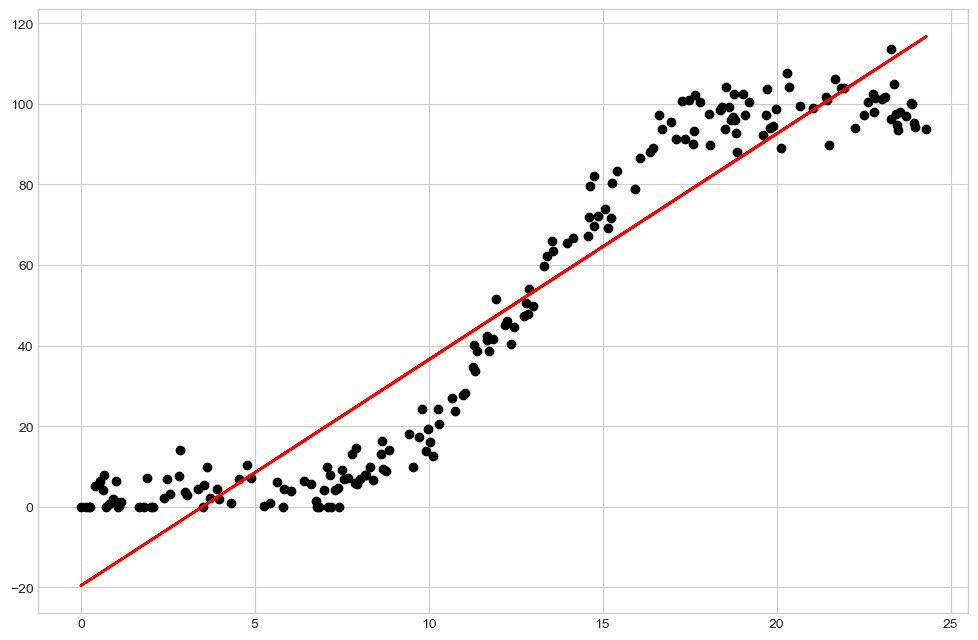

In [48]:
plt.scatter(X_test, y_test,  color='black') #plot scatters
plt.plot(X_test, y_pred, color='red', linewidth=2) #plot line

plt.show()

Again, the results show the alogrithm is unsuitable. The model is underfitting: proofing too inflexible and not accounting for the data being unable to capture patterns in the data. To overcome the problem of under-fitting, the complexity of the model needs to increased [6].



### Model 2 : Polynomial Regression.

A Polynominal Model is a special case of a linear model and can be used to fit a nonlinear data [5]. A straightforward way to do this is to add powers of each feature as new features [5].  Then, train a linear model on this extended set of features[5]. 

### Degrees = 2

So to begin the number of degrees will be set to 2. As to generate a higher order equation add powers of the original features as new features. The linear model: 
$$y = \theta_0 + \theta_1 x $$

can then be transformed to:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2$$ 

This is still a linear model as the coefficients associated with the features are still linear. x² is only a feature. But the curve being fitted is quadratic in nature [6]

In [ ]:
# Adapted from : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# Adapted from https://towardsdatascience.com/polynomial-regression-with-a-machine-learning-pipeline-7e27d2dedc87
# sklearn.preprocessing.PolynomialFeatures

In [38]:
# Setting the test size = 0.2 using a random state to perserve outputs. 
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [49]:
# set the polynominal degrees to be 2
polyfeatures = PolynomialFeatures(degree=2, include_bias=False)
# create new features for the training data i.e. powers of x (adding a new variable x powered)
X_train_p =polyfeatures.fit_transform(X_train)

In [50]:
# Create a new linear model
polyreg = linear_model.LinearRegression()
# Train the model using the new dataset 
polyreg.fit(X_train_p, y_train)

# now create new features for the test data
X_test_p =polyfeatures.fit_transform(X_test)

# predict new y values for test data.
y_pred_p = polyreg.predict(X_test_p)

### Plot the result

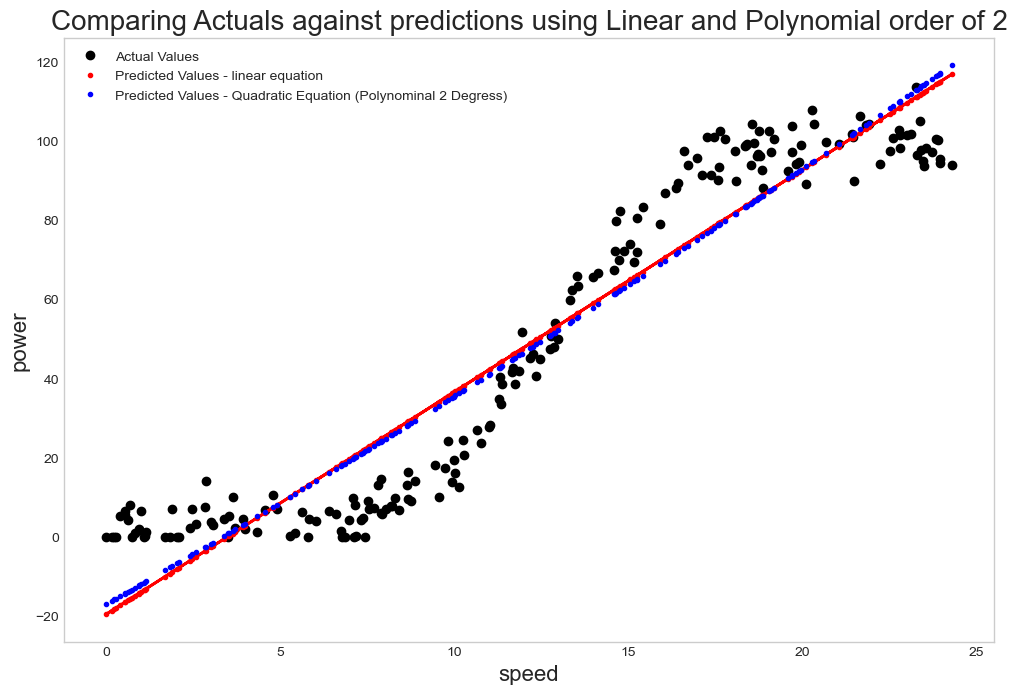

In [51]:
# Adapted from https://stackoverflow.com/questions/46096347/plot-polynomial-regression-in-python-with-scikit-learn
# plt.plot(dfclean['speed'], dfclean['power'],  'og', label="cleaned data")
# plt.scatter(X_test, y_test,  color='black') #plot scatters
# plt.plot(X_test_p, y_pred_p, color='red', linewidth=2) #plot line


plt.plot(X_test, y_test, 'ok', label="Actual Values") 
plt.plot(X_test, y_pred, color='red', linewidth=2) #plot line
plt.plot(X_test, y_pred, '.r', label = "Predicted Values - linear equation") 
plt.plot(X_test, y_pred_p, '.b', label = "Predicted Values - Quadratic Equation (Polynominal 2 Degress)")
plt.xlabel('speed', fontsize='16')
plt.ylabel('power', fontsize='16')
plt.title("Comparing Actuals against predictions using Linear and Polynomial order of 2", fontsize = 20)
plt.grid()
plt.legend()
plt.show()



### Evaluate the result

It is quite clear visually from the plot that the quadratic curve (polynominal with degrees = 2) is not able to fit the data much better than the linear line. 

In [ ]:
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse_poly_d2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p))
r2_linear = metrics.r2_score(y_test,y_pred)
r2_poly_d2 = metrics.r2_score(y_test,y_pred_p)
print("RMSE value for linear equation: ", rmse_linear)
print("RMSE value using Polynomial with degrees = 2: ",rmse_poly_d2  )
print("R2 Value using linear equation: ", r2_linear)
print("R2 Value using polynominal equation with degrees = 2: ", r2_poly_d2)

We can see that RMSE has decreased but the R²score has increased as compared to the linear line. We need an improvement in both ***metrics***

### Model 2 : Polynomial Regression with 3 degrees.

The next step is to try a cubic curve (degree=3) by powering up our existing equation(quadatric)[6]:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2  + \theta_3x^3$$ 


In [52]:
# set the polynominal degrees to be 3
polyfeatures3 = PolynomialFeatures(degree=3, include_bias=False)
# create new features for the training data i.e. adding new variables to create a cubic equation.
X_train_p3 =polyfeatures3.fit_transform(X_train)

In [53]:
# Create a new cubic model
polyreg3 = linear_model.LinearRegression()
# Train the model using the new dataset 
polyreg3.fit(X_train_p3, y_train)

# now create new features for the test data
X_test_p3 =polyfeatures3.fit_transform(X_test)

# predict new y values for test data.
y_pred_p3 = polyreg3.predict(X_test_p3)

In [ ]:
Plot the result

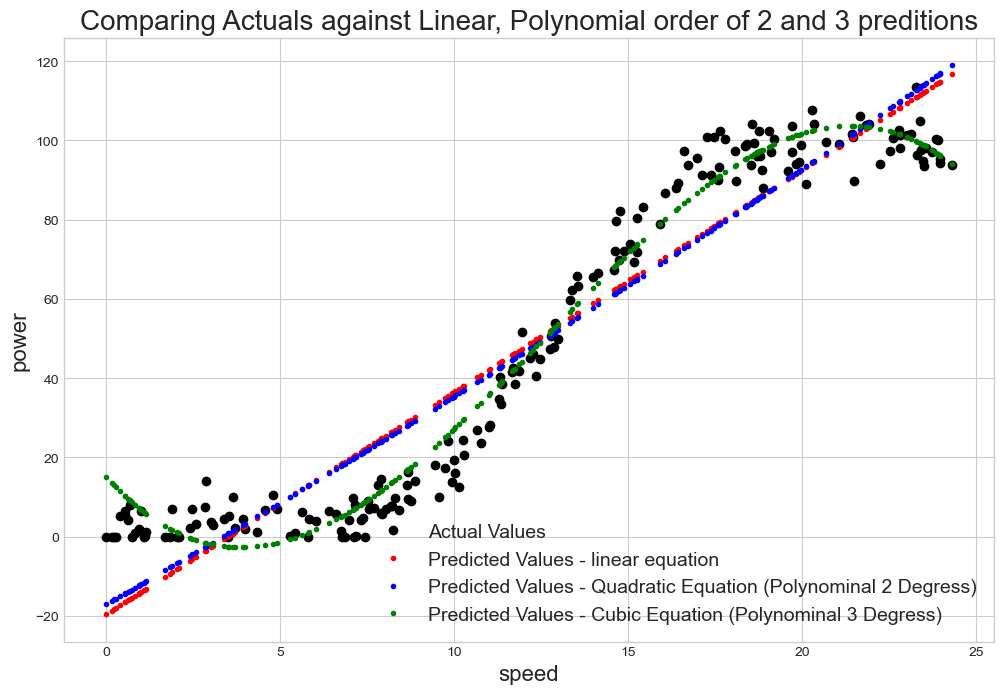

In [54]:
# plot the results & compare

plt.plot(X_test, y_test, 'ok', label="Actual Values") 
plt.plot(X_test, y_pred, '.r', label = "Predicted Values - linear equation") 
plt.plot(X_test, y_pred_p, '.b', label = "Predicted Values - Quadratic Equation (Polynominal 2 Degress)")
plt.plot(X_test, y_pred_p3, '.g', label = "Predicted Values - Cubic Equation (Polynominal 3 Degress)")
plt.xlabel('speed', fontsize='16')
plt.ylabel('power', fontsize='16')
plt.title("Comparing Actuals against Linear, Polynomial order of 2 and 3 preditions", fontsize = 20)
plt.grid()
plt.legend(fontsize = 14)
plt.grid()
plt.show()

### Evaluate the result

The visulations shows that predicted values using a Cubic equation (Polynominal 3 Degrees) is a better model.

In [ ]:
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse_poly_d2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p))
rmse_poly_d3 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p3))
r2_linear = metrics.r2_score(y_test,y_pred)
r2_poly_d2 = metrics.r2_score(y_test,y_pred_p)
r2_poly_d3 = metrics.r2_score(y_test,y_pred_p3)
print("RMSE value for linear equation: ", rmse_linear)
print("RMSE value using Polynomial with degrees = 2: ",rmse_poly_d2)
print("RMSE value using Polynomial with degrees = 3: ",rmse_poly_d3)
print("R2 Value using linear equation: ", r2_linear)
print("R2 Value using polynominal equation with degrees = 2: ", r2_poly_d2)
print("R2 Value using polynominal equation with degrees = 3: ", r2_poly_d3)

The RMSE when using a cubic equation has decreased for polynominal with degrees = 3 and the R²-score has increased as compared to the linear line results. Therefore Polynominal model with degrees = 3 is the best fit so far.

In [ ]:
# set the polynominal degrees to be 3
polyfeatures4 = PolynomialFeatures(degree=4, include_bias=False)
# create new features for the training data i.e. adding new variables to create a cubic equation.
X_train_p4 =polyfeatures4.fit_transform(X_train)
# Create a new cubic model
polyreg4 = linear_model.LinearRegression()
# Train the model using the new dataset 
polyreg4.fit(X_train_p4, y_train)

# now create new features for the test data
X_test_p4 =polyfeatures4.fit_transform(X_test)

# predict new y values for test data.
y_pred_p4 = polyreg4.predict(X_test_p4)

In [ ]:
rmse_poly_d4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_p4))
r2_poly_d4 = metrics.r2_score(y_test,y_pred_p4)
print("RMSE value using Polynomial with degrees = 4: ",rmse_poly_d4)
print("R2 Value using polynominal equation with degrees = 4: ", r2_poly_d4)

Therefore, the optimal model so far is a polynominal equation with degrees = 4.

## Two Problems

1. How many dregrees should I use in a polynomial equation? Should I keep increase the number of degrees further?  
2. Should the data points where speed > 24.5 be included in the model? (I went back and excluded these values) No longer an issue. 

## Deciding upon the optimum number of degrees to use. 

In [55]:
# Creating a function to apply create a polynominal equation based on nth number of dregrees 

def polynomialmodel(n):
    # set the polynominal degrees to be n
    polyfeaturesn = PolynomialFeatures(degree=n, include_bias=False)
# create new features for the training data i.e. adding new variables to create a cubic equation.
    X_train_pn =polyfeaturesn.fit_transform(X_train)
    # Create a new cubic model
    polyregn = linear_model.LinearRegression()
# Train the model using the new dataset 
    polyregn.fit(X_train_pn, y_train)

# now create new features for the test data
    X_test_pn =polyfeaturesn.fit_transform(X_test)

# predict new y values for test data.
    y_pred_pn = polyregn.predict(X_test_pn)
    rmse_poly_n = np.sqrt(metrics.mean_squared_error(y_test,y_pred_pn))
    r2_poly_n = metrics.r2_score(y_test,y_pred_pn)
    print(f'For {n} degrees the RMSE is {np.sqrt(metrics.mean_squared_error(y_test,y_pred_pn))}')
    print(f'For {n} degrees the R2 is {metrics.r2_score(y_test,y_pred_pn)}')
    return n, rmse_poly_n, r2_poly_n
    
    
    

In [56]:
# Compare the RMSE and R2 results for each model with degrees from 2 to 8
 
for i in range(2,10):
    polynomialmodel(i)
    

For 2 degrees the RMSE is 13.323283754748529
For 2 degrees the R2 is 0.8974629890185972
For 3 degrees the RMSE is 6.19445728814166
For 3 degrees the R2 is 0.9778351588100399
For 4 degrees the RMSE is 5.905475989967316
For 4 degrees the R2 is 0.9798549701755479
For 5 degrees the RMSE is 4.3784347453578665
For 5 degrees the R2 is 0.9889262207589685
For 6 degrees the RMSE is 4.379767202166241
For 6 degrees the R2 is 0.9889194797299966
For 7 degrees the RMSE is 4.265078430468941
For 7 degrees the R2 is 0.9894921916768121
For 8 degrees the RMSE is 4.231203629684707
For 8 degrees the R2 is 0.9896584424868307
For 9 degrees the RMSE is 4.3069289783782425
For 9 degrees the R2 is 0.989284966850481


Under-fitting / Over-fitting
Under-fitting occurs when the model cannot adequately capture the underlying structure of the data (as seen in the linear model above and polynominal with degree = 2).
In contrast, over-fitting produces an analysis that corresponds too closely to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably [6]. At this point, I am unsure what is the optimal degrees to use. Degrees = 3 is definitely better than degrees = 2 since for degrees = 3 the RMSE value is lower and the R2 value is higher. As the number of degrees is raised further the RMSE and R2 results do not significantly change until number of degrees applied is 7.  I then worry that we are overfitting the data. 

In order to move on in this task, I will then use number of degrees = 3 for the polynominal model. However, regardless of degrees I am not satified with how the very low speeds ie < 5 are predicted using a polynominal model. I will try to implement a Keras model and hope for improved accuracy overall but in particular in relation to very low and wind speeds.

### Model 3: Keras

Deep learning refers to artificial neural networks with multiple hidden layers that can learn increasingly abstract representations of input data. Neural networks can find complex relationships between features. It is a highly-structured graph, organized into one or more hidden layers. Each hidden layer consists of one or more neurons. An artificial neuron fires depending on the inputs it receives. 


For this task, a neural netwwork with a sequential model will be used as it is most appropriate for simple layers where each layer has exactly one input tensor and one output tensor [7]. It involves defining a Sequential class and then adding layers to the model one by one ,from input to output [8]. In model below,  Sequential constructor is used to create a model, which will then have layers added to it using the add() method. The first such call adds a layer of type Dense . The Dense layer has an output of size (50 in the case of the first layer added below), and an input of shape of one dimension. 

In [57]:
# Create a new neural network.
model = keras.models.Sequential()
# adding two layers 
# one input tensor but with 50 hidden layers.
# the input shape (depth, width, height) of each input in this case a ID variable.
# using activiation sigmoid as the sigmoid shape most closely aligns with the data set.
# using kernel
model.add(keras.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# adding another layer single density but with activiation linear to cope with any 0
model.add(keras.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# using Adam optimizer but adding a learning rate of 0.001 to Adam so that it doesnt train to quickly
model.compile(keras.optimizers.Adam(lr=0.001), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


The first Dense layer has 50 neurons plus 50 bias terms = 100 parameters for this layer. The second Dense layer has output layer with 1 neuron with bias of 1 and 50 inputs feeding to it, = 51 parameters. The complete neural network then 151 parameters.

In [58]:
# the number of epochs (loops through the training dataset) and the batch size (number of samples in an epoch used to estimate model error).
# ie the number of times we train an x value inputed.
# batch size is set to 10 to evaluate 10 values at a time
fithistory = model.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
30/30 [==============================] - 1s 2ms/step - loss: 4090.9131
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 4253.8616
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 3749.2704
Epoch 4/500
30/30 [==============================] - ETA: 0s - loss: 3627.61 - 0s 4ms/step - loss: 3632.3015
Epoch 5/500
30/30 [==============================] - 0s 4ms/step - loss: 3820.5300
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 3349.9453
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 3179.7451
Epoch 8/500
30/30 [==============================] - 0s 2ms/step - loss: 3074.0667
Epoch 9/500
30/30 [==============================] - 0s 3ms/step - loss: 3305.8869
Epoch 10/500
30/30 [==============================] - 0s 5ms/step - loss: 3184.8111
Epoch 11/500
30/30 [==============================] - 0s 2ms/step - loss: 2896.1963
Epoch 12/500
30/30 [==============================] - 0s 6m

30/30 [==============================] - 0s 2ms/step - loss: 304.1176
Epoch 99/500
30/30 [==============================] - 0s 4ms/step - loss: 296.4200
Epoch 100/500
30/30 [==============================] - 0s 5ms/step - loss: 289.4261
Epoch 101/500
30/30 [==============================] - 0s 2ms/step - loss: 287.7405
Epoch 102/500
30/30 [==============================] - 0s 2ms/step - loss: 270.6251
Epoch 103/500
30/30 [==============================] - 0s 3ms/step - loss: 248.7084
Epoch 104/500
30/30 [==============================] - 0s 5ms/step - loss: 278.3253
Epoch 105/500
30/30 [==============================] - 0s 5ms/step - loss: 259.0945
Epoch 106/500
30/30 [==============================] - 0s 3ms/step - loss: 261.6188
Epoch 107/500
30/30 [==============================] - 0s 3ms/step - loss: 258.0325
Epoch 108/500
30/30 [==============================] - 0s 2ms/step - loss: 226.2941
Epoch 109/500
30/30 [==============================] - 0s 3ms/step - loss: 230.8552
Epoch 1

30/30 [==============================] - 0s 3ms/step - loss: 78.5148
Epoch 196/500
30/30 [==============================] - 0s 2ms/step - loss: 70.0148
Epoch 197/500
30/30 [==============================] - 0s 2ms/step - loss: 65.9113
Epoch 198/500
30/30 [==============================] - 0s 2ms/step - loss: 68.4262
Epoch 199/500
30/30 [==============================] - 0s 3ms/step - loss: 63.4240
Epoch 200/500
30/30 [==============================] - 0s 3ms/step - loss: 70.9872
Epoch 201/500
30/30 [==============================] - 0s 2ms/step - loss: 70.5941
Epoch 202/500
30/30 [==============================] - 0s 3ms/step - loss: 73.0840
Epoch 203/500
30/30 [==============================] - 0s 3ms/step - loss: 62.9373
Epoch 204/500
30/30 [==============================] - 0s 4ms/step - loss: 70.1129
Epoch 205/500
30/30 [==============================] - 0s 2ms/step - loss: 64.9137
Epoch 206/500
30/30 [==============================] - 0s 5ms/step - loss: 73.9051
Epoch 207/500
30/3

30/30 [==============================] - 0s 3ms/step - loss: 50.1457
Epoch 294/500
30/30 [==============================] - 0s 5ms/step - loss: 47.3568
Epoch 295/500
30/30 [==============================] - 0s 3ms/step - loss: 51.4887
Epoch 296/500
30/30 [==============================] - 0s 2ms/step - loss: 62.2617
Epoch 297/500
30/30 [==============================] - 0s 2ms/step - loss: 56.6769
Epoch 298/500
30/30 [==============================] - ETA: 0s - loss: 62.30 - 0s 3ms/step - loss: 59.8024
Epoch 299/500
30/30 [==============================] - 0s 5ms/step - loss: 50.4218
Epoch 300/500
30/30 [==============================] - 0s 5ms/step - loss: 56.3269
Epoch 301/500
30/30 [==============================] - 0s 3ms/step - loss: 52.9548
Epoch 302/500
30/30 [==============================] - 0s 2ms/step - loss: 49.9138
Epoch 303/500
30/30 [==============================] - 0s 6ms/step - loss: 56.0994
Epoch 304/500
30/30 [==============================] - 0s 3ms/step - loss: 56

30/30 [==============================] - 0s 3ms/step - loss: 42.0428
Epoch 392/500
30/30 [==============================] - 0s 3ms/step - loss: 41.0562
Epoch 393/500
30/30 [==============================] - 0s 5ms/step - loss: 32.1846
Epoch 394/500
30/30 [==============================] - 0s 5ms/step - loss: 39.2654
Epoch 395/500
30/30 [==============================] - 0s 3ms/step - loss: 36.1241
Epoch 396/500
30/30 [==============================] - 0s 1ms/step - loss: 36.2685
Epoch 397/500
30/30 [==============================] - 0s 1ms/step - loss: 40.1714
Epoch 398/500
30/30 [==============================] - 0s 1ms/step - loss: 37.5316
Epoch 399/500
30/30 [==============================] - 0s 3ms/step - loss: 34.9570
Epoch 400/500
30/30 [==============================] - 0s 4ms/step - loss: 37.2382
Epoch 401/500
30/30 [==============================] - 0s 3ms/step - loss: 34.7349
Epoch 402/500
30/30 [==============================] - 0s 3ms/step - loss: 34.0116
Epoch 403/500
30/3

30/30 [==============================] - 0s 6ms/step - loss: 25.2494
Epoch 490/500
30/30 [==============================] - 0s 3ms/step - loss: 27.3778
Epoch 491/500
30/30 [==============================] - 0s 2ms/step - loss: 29.2164
Epoch 492/500
30/30 [==============================] - 0s 1ms/step - loss: 24.4321
Epoch 493/500
30/30 [==============================] - 0s 1ms/step - loss: 25.6112
Epoch 494/500
30/30 [==============================] - 0s 2ms/step - loss: 24.3045
Epoch 495/500
30/30 [==============================] - 0s 4ms/step - loss: 25.4722
Epoch 496/500
30/30 [==============================] - 0s 3ms/step - loss: 22.9262
Epoch 497/500
30/30 [==============================] - 0s 4ms/step - loss: 22.0095
Epoch 498/500
30/30 [==============================] - 0s 4ms/step - loss: 24.5072
Epoch 499/500
30/30 [==============================] - 0s 4ms/step - loss: 22.4478
Epoch 500/500
30/30 [==============================] - 0s 4ms/step - loss: 23.9517


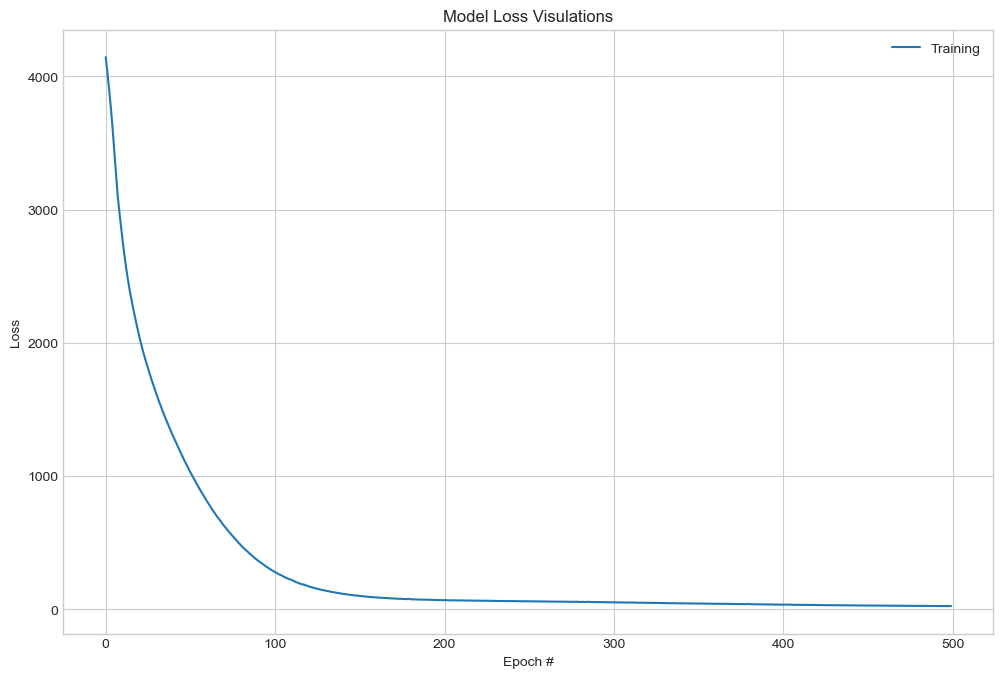

In [60]:
# As the model continues to fit the loss should decrease as the number of epochs completed rises.
# Plot train vs val 

plt.plot(fithistory.history['loss'])
plt.title('Model Loss Visulations')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['Training', 'Valuation/Test'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

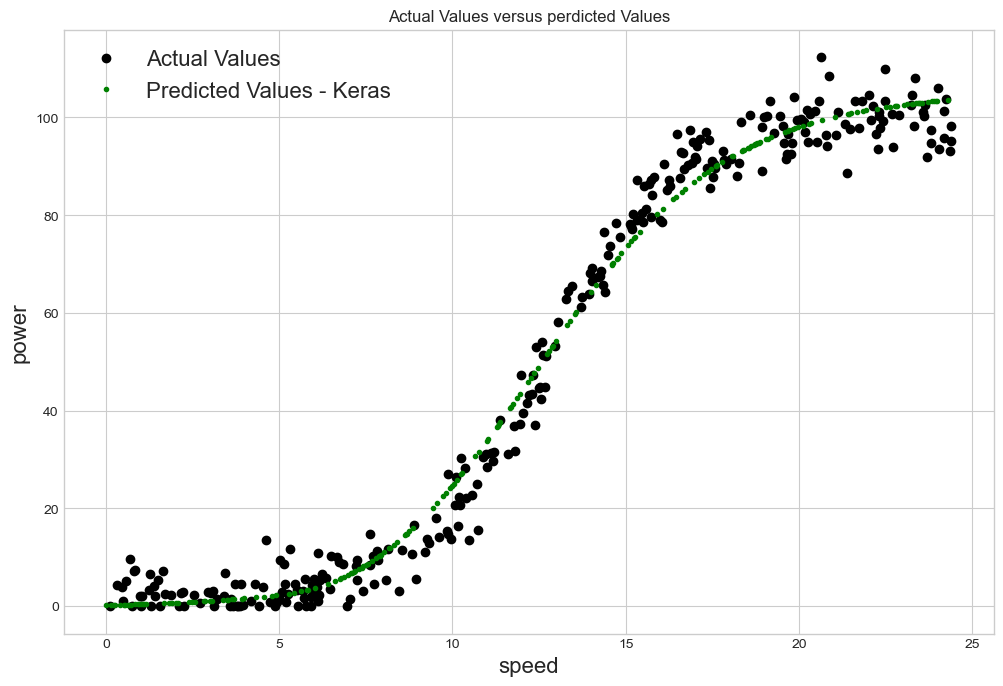

In [62]:
plt.plot(X_train, y_train, 'ok', label="Actual Values") 
plt.plot(X_test, model.predict(X_test), '.g', label = "Predicted Values - Keras")
plt.title("Actual Values versus perdicted Values")
plt.xlabel('speed', fontsize='16')
plt.ylabel('power', fontsize='16')
plt.legend(fontsize = 16)
plt.show


## References

[1] https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm    
[2] Kotu, V., & Deshpande, B., "Anomaly Detection", Science Direct https://www.sciencedirect.com/topics/computer-science/anomaly-detection  
[3] Robinson, S. "Linear Regression in Python with Scikit-Learn", Stack Abuse https://stackabuse.com/linear-regression-in-python-with-scikit-learn/  
[4] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html  
[5] Pramoditha, R, "Polynomial Regression with a Machine Learning", Towards DataScience, https://towardsdatascience.com/polynomial-regression-with-a-machine-learning-pipeline-7e27d2dedc87  
[6] Agarwal A., 2018, "Polynomial Regression" Towards Data Science, https://towardsdatascience.com/polynomial-regression-bbe8b9d97491  
[7] Chollet F., "Developer guides / The Sequential model", Keras, https://keras.io/guides/sequential_model/   
[8] Brownlee, J. 2019"TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras", Machine Learning Mastery, https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/  

